## Estudo comparativo de treino para o yolov{8,9,10}
>requisitos para rodar o dataset

* token do dataset do roboflow

* conexao com o drive para conseguir salvar os resultados dos testes e pesos

## Benchmark da ultralytics entre as versões

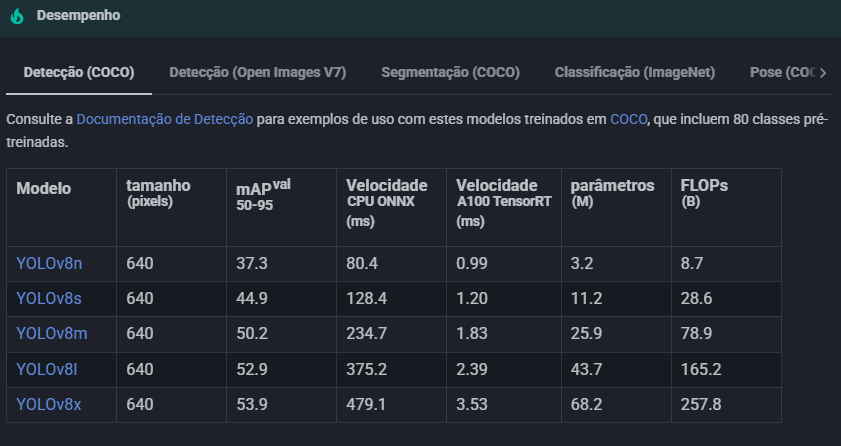

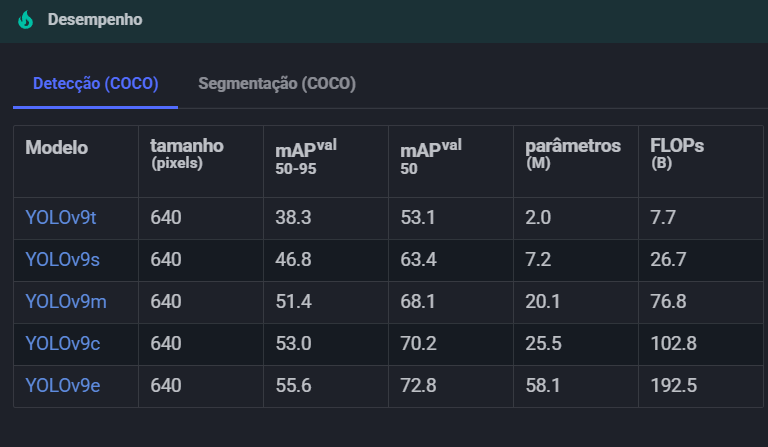


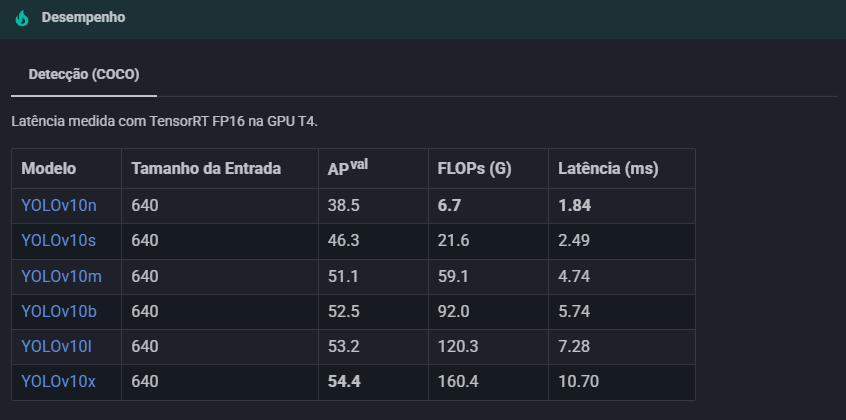
---



## Environment setup

In [1]:
#deps
!pip3 install -q torch torchvision --index-url https://download.pytorch.org/whl/cu126
!pip3 install -q roboflow supervision ultralytics opencv-python


[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
ROBOFLOW_DATASET_VERSION=5

In [2]:
import os
from dotenv import load_dotenv
load_dotenv()
# from google.colab import userdata

ROBOFLOW_API_KEY = os.getenv("ROBOFLOW_API_KEY") or userdata.get('ROBOFLOW_API_KEY');

if(not ROBOFLOW_API_KEY):
    raise ValueError("ROBOFLOW_API_KEY não encontrada!!.")

In [ ]:
#monta o volume do google drive para conseguir jogar a pasta de treino para dentro dele mais tarde
from google.colab import drive
drive.mount('/content/drive')


### Check GPU availability


In [3]:
%env CUDA_LAUNCH_BLOCKING=1
!nvidia-smi
import torch
if torch.cuda.is_available():
    torch.cuda.empty_cache()

env: CUDA_LAUNCH_BLOCKING=1
Mon Nov 17 14:20:01 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 572.83                 Driver Version: 572.83         CUDA Version: 12.8     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                  Driver-Model | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce RTX 4050 ...  WDDM  |   00000000:01:00.0 Off |                  N/A |
| N/A   40C    P8              1W /  105W |      79MiB /   6141MiB |      0%      Default |
|                                         |                        |                  N/A |
+-------------------

In [3]:
import os
HOME = os.getcwd()
print(HOME)

c:\workspace\faculda_10_sem\VisaoComputacionalProjeto\computerVision-forbiddenObjects\jupyter


## Download dataset from Roboflow Universe

In [4]:
from roboflow import download_dataset, Roboflow

rf = Roboflow(api_key=ROBOFLOW_API_KEY)
project = rf.workspace("ethos-ugyxt").project("ac2-visao-bfkss")
version = project.version(ROBOFLOW_DATASET_VERSION)
dataset = version.download("yolov9")#aqui é so para saber qual vai ser o formato do dataset, o v9 ja é compativel com os outros modelos mais novos

print(dataset)


loading Roboflow workspace...
loading Roboflow project...


In [ ]:
!ls {dataset.location}

 O volume na unidade C � Windows
 O N�mero de S�rie do Volume � 22A1-CC7D

 Pasta de c:\workspace\faculda_10_sem\VisaoComputacionalProjeto\computerVision-forbiddenObjects\jupyter\ac2-visao-5

17/11/2025  13:58    <DIR>          .
17/11/2025  14:00    <DIR>          ..
17/11/2025  14:03               469 data.yaml
17/11/2025  13:58               143 README.dataset.txt
17/11/2025  13:58               998 README.roboflow.txt
17/11/2025  13:58    <DIR>          test
17/11/2025  13:58    <DIR>          train
17/11/2025  13:58    <DIR>          valid
               3 arquivo(s)          1.610 bytes
               5 pasta(s)   114.309.394.432 bytes dispon�veis


In [7]:
print(dataset.location)

c:\workspace\faculda_10_sem\VisaoComputacionalProjeto\computerVision-forbiddenObjects\jupyter\ac2-visao-5


In [5]:
# Certifique-se de que a variável 'dataset.location' está definida
# A linha abaixo é apenas um exemplo, use a definição real da variável
# dataset.location = '/path/to/your/dataset'

# Constrói o caminho completo do arquivo
file_path = f"{dataset.location}/data.yaml"

# 1. Lê todas as linhas do arquivo
try:
    with open(file_path, 'r') as f:
        lines = f.readlines()

    # 2. Remove as últimas 4 linhas (equivalente aos 4 comandos 'sed')
    # Usamos slicing: pega todas as linhas, exceto as últimas 4
    lines = lines[:-4]

    # 3. Adiciona as novas linhas no final (equivalente ao 'echo >>')
    lines.append("test: ../test/images\n")
    lines.append("train: ../train/images\n")
    lines.append("val: ../valid/images\n")

    # 4. Escreve todo o conteúdo modificado de volta no arquivo
    with open(file_path, 'w') as f:
        f.writelines(lines)

    print(f"Arquivo '{file_path}' atualizado com sucesso.")

except FileNotFoundError:
    print(f"Erro: O arquivo '{file_path}' não foi encontrado.")
except Exception as e:
    print(f"Ocorreu um erro: {e}")

Arquivo 'c:\workspace\faculda_10_sem\VisaoComputacionalProjeto\computerVision-forbiddenObjects\jupyter\ac2-visao-5/data.yaml' atualizado com sucesso.


In [42]:
!type {dataset.location}/data.yaml


A sintaxe do comando est� incorreta.


In [ ]:
#dowload args
!curl -O  https://raw.githubusercontent.com/Nathan-Rgs/computerVision-forbiddenObjects/dev/jupyter/arg.yml

!cat arg.yml

raise InterruptedError('Mude o args os args baixados antes de ir para o treinamento')

'cat' n�o � reconhecido como um comando interno
ou externo, um programa oper�vel ou um arquivo em lotes.


InterruptedError: Mude o args os args baixados antes de ir para o treinamento

## Fine-tune YOLO models


In [7]:
from ultralytics import YOLO

In [8]:

model_v9 = YOLO('yolov9m.pt')

project="Benchmark_Visao"
name="Run_YOLOv9"

results_v9 = model_v9.train(
    data=f'{dataset.location}/data.yaml',
    cfg="arg.yml",
    project=project,
    name=name
)

New https://pypi.org/project/ultralytics/8.3.228 available  Update with 'pip install -U ultralytics'
Ultralytics 8.3.215  Python-3.12.3 torch-2.9.0+cu126 CUDA:0 (NVIDIA GeForce RTX 4050 Laptop GPU, 6140MiB)
engine\trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=8, bgr=0.0, box=7.5, cache=False, cfg=arg.yml, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=0.25, copy_paste=0.0, copy_paste_mode=flip, cos_lr=True, cutmix=0.0, data=c:\workspace\faculda_10_sem\VisaoComputacionalProjeto\computerVision-forbiddenObjects\jupyter\ac2-visao-5/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=100, erasing=0.0, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=tr

In [9]:

model_v8 = YOLO('yolov8m.pt')

project="Benchmark_Visao"
name="Run_YOLOv8"

results_v8 = model_v8.train(
    data=f'{dataset.location}/data.yaml',
    cfg="arg.yml",
    project=project,
    name=name
)

New https://pypi.org/project/ultralytics/8.3.228 available  Update with 'pip install -U ultralytics'
Ultralytics 8.3.215  Python-3.12.3 torch-2.9.0+cu126 CUDA:0 (NVIDIA GeForce RTX 4050 Laptop GPU, 6140MiB)
engine\trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=8, bgr=0.0, box=7.5, cache=False, cfg=arg.yml, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=0.25, copy_paste=0.0, copy_paste_mode=flip, cos_lr=True, cutmix=0.0, data=c:\workspace\faculda_10_sem\VisaoComputacionalProjeto\computerVision-forbiddenObjects\jupyter\ac2-visao-5/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=100, erasing=0.0, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=tr

In [8]:

model_v10 = YOLO('yolov10m.pt')

project="Benchmark_Visao"
name="Run_YOLOv10"

results_v10 = model_v10.train(
    data=f'{dataset.location}/data.yaml',
    cfg="arg.yml",
    project=project,
    name=name
)

New https://pypi.org/project/ultralytics/8.3.228 available  Update with 'pip install -U ultralytics'
Ultralytics 8.3.215  Python-3.12.3 torch-2.9.0+cu126 CUDA:0 (NVIDIA GeForce RTX 4050 Laptop GPU, 6140MiB)
engine\trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=8, bgr=0.0, box=7.5, cache=False, cfg=arg.yml, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=0.25, copy_paste=0.0, copy_paste_mode=flip, cos_lr=True, cutmix=0.0, data=c:\workspace\faculda_10_sem\VisaoComputacionalProjeto\computerVision-forbiddenObjects\jupyter\ac2-visao-5/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=100, erasing=0.0, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=tr

In [ ]:
# Define the source directory (where the training results are saved)
SOURCE_DIR=f"/content/{project}"

# Define the destination directory on Google Drive
DEST_DIR=f"/content/drive/MyDrive/Benchmark_Visao_Results"

# Create the destination directory on Google Drive if it doesn't exist
!mkdir -p "$DEST_DIR"

# Copy the contents of the source directory to the destination directory
!cp -r "$SOURCE_DIR" "$DEST_DIR"
!cp arg.yml "$DEST_DIR"
!echo "Training results copied to Google Drive: $DEST_DIR"

Training results copied to Google Drive: /content/drive/MyDrive/Benchmark_Visao_Results


## Evaluate fine-tuned

In [ ]:
import locale
locale.getpreferredencoding = lambda: "UTF-8"

# List the directories created by the training runs
!ls /content/Benchmark_Visao/

Run_YOLOv10  Run_YOLOv8  Run_YOLOv9


## Evaluate fine-tuned models

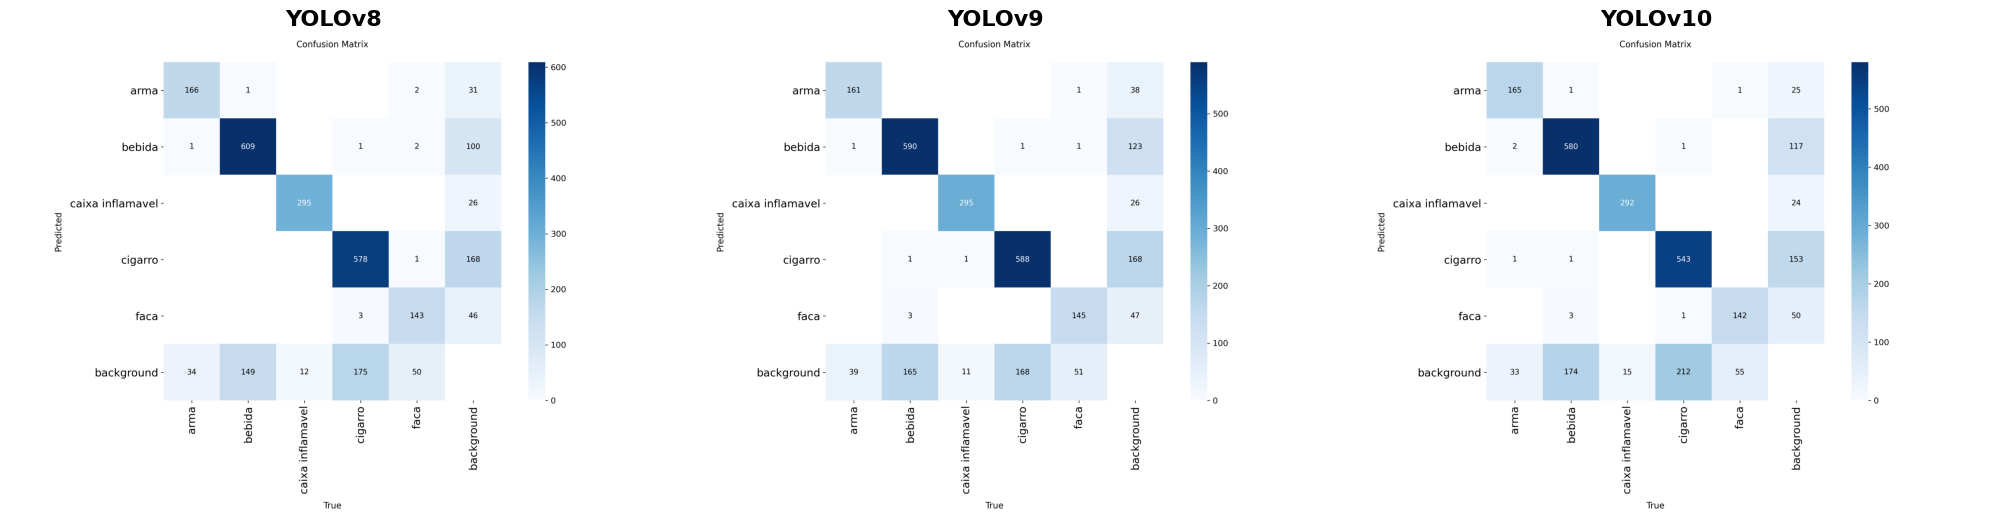

In [35]:
# Adicione esta linha mágica no topo para garantir que o gráfico apareça
%matplotlib inline 

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Caminhos e títulos
graficos = [
    {"titulo": "YOLOv8",  "arquivo": f'{HOME}/Benchmark_Visao/Run_YOLOv8/confusion_matrix.png'},
    {"titulo": "YOLOv9",  "arquivo": f'{HOME}/Benchmark_Visao/Run_YOLOv9/confusion_matrix.png'},
    {"titulo": "YOLOv10", "arquivo": f'{HOME}/Benchmark_Visao/Run_YOLOv10/confusion_matrix.png'}
]

# Cria a figura
fig, ax = plt.subplots(1, 3, figsize=(20, 6))

for i, item in enumerate(graficos):
    try:
        img = mpimg.imread(item["arquivo"])
        ax[i].imshow(img)
        ax[i].set_title(item["titulo"], fontsize=16, fontweight='bold')
        ax[i].axis('off')
    except FileNotFoundError:
        # Fallback se a imagem não for achada
        ax[i].text(0.5, 0.5, "Imagem não encontrada", ha='center', va='center')
        ax[i].set_title(item["titulo"])
        ax[i].axis('off')

plt.tight_layout()

# O ponto e vírgula aqui esconde o texto "<Figure size...>"
plt.show();

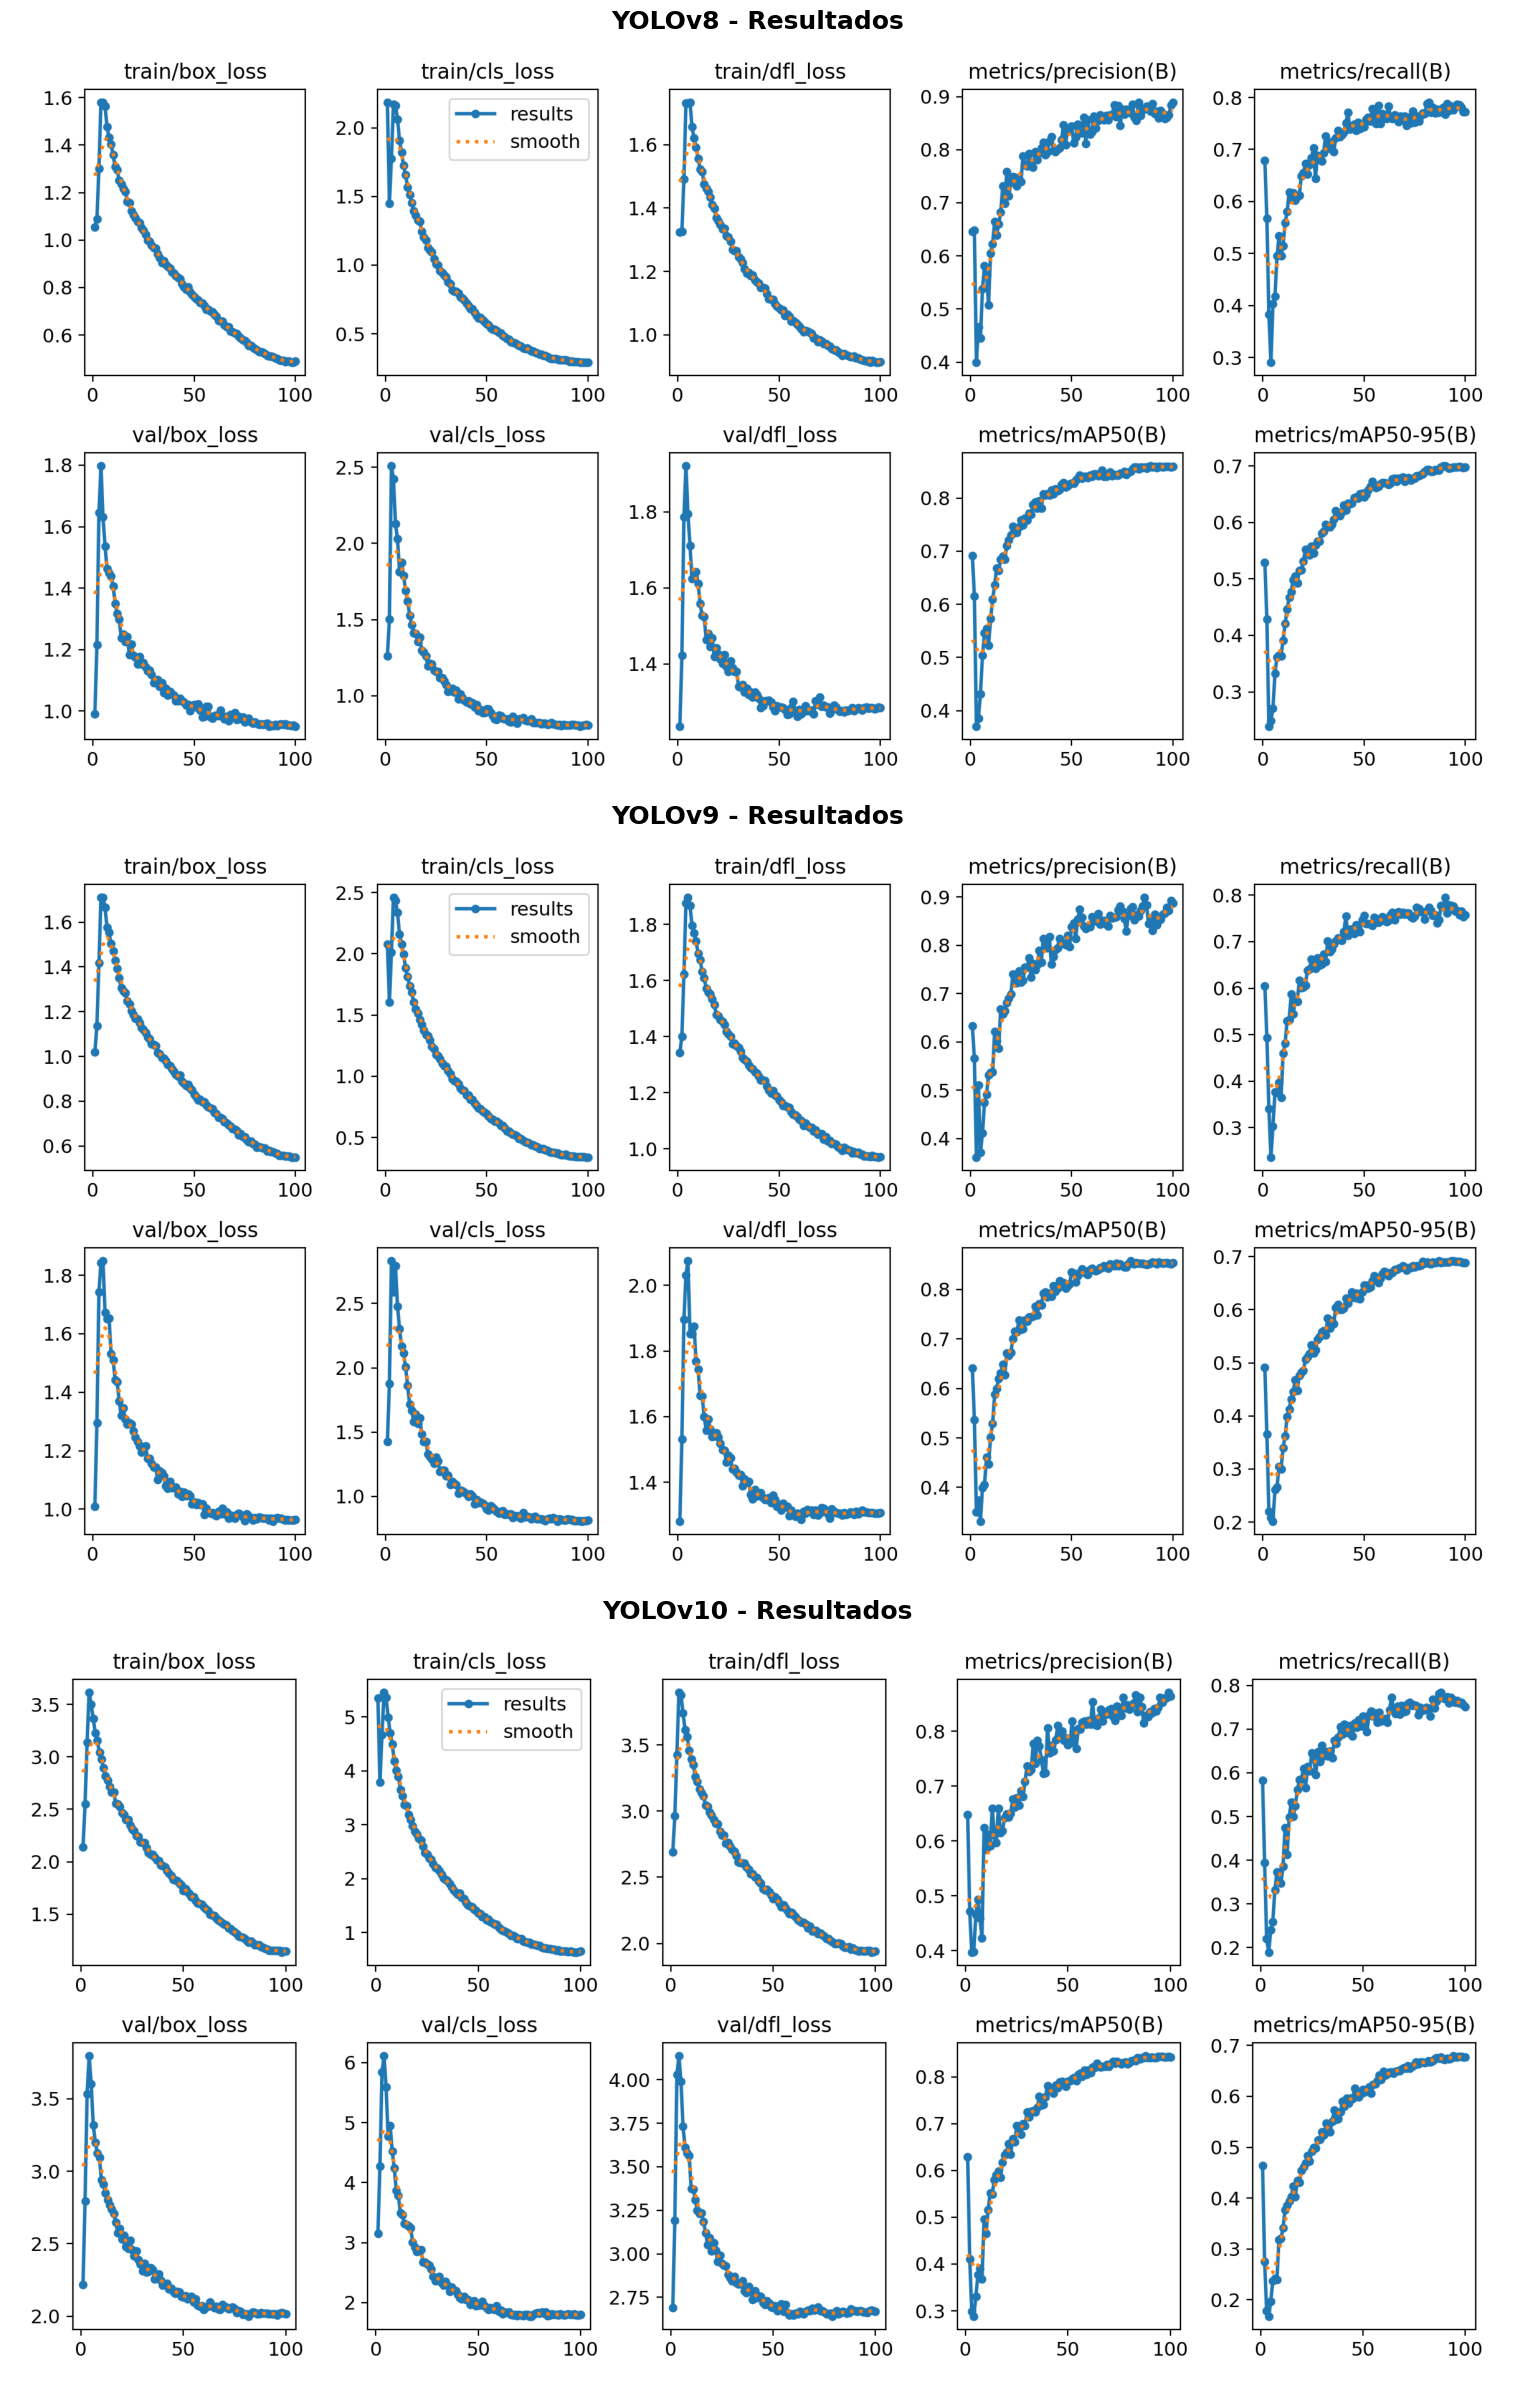

In [36]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Configuração dos caminhos
graficos = [
    {"titulo": "YOLOv8 - Resultados",  "arquivo": f'{HOME}/Benchmark_Visao/Run_YOLOv8/results.png'},
    {"titulo": "YOLOv9 - Resultados",  "arquivo": f'{HOME}/Benchmark_Visao/Run_YOLOv9/results.png'},
    {"titulo": "YOLOv10 - Resultados", "arquivo": f'{HOME}/Benchmark_Visao/Run_YOLOv10/results.png'}
]

# Cria uma figura com 3 LINHAS e 1 COLUNA
# Aumentamos a altura (24) para caber as 3 imagens grandes sem distorção
fig, ax = plt.subplots(3, 1, figsize=(16, 24))

for i, item in enumerate(graficos):
    try:
        img = mpimg.imread(item["arquivo"])
        
        # Exibe na linha correspondente
        ax[i].imshow(img)
        
        # Título e formatação
        ax[i].set_title(item["titulo"], fontsize=18, fontweight='bold', pad=10)
        ax[i].axis('off') # Remove bordas desnecessárias
        
    except FileNotFoundError:
        ax[i].text(0.5, 0.5, f"Imagem não encontrada: {item['titulo']}", 
                   ha='center', va='center', fontsize=14)
        ax[i].set_title(item["titulo"])
        ax[i].axis('off')

plt.tight_layout()
plt.show();

In [38]:
import supervision as sv
from ultralytics import YOLO
from supervision.metrics import MeanAveragePrecision

# Load the dataset for evaluation
ds = sv.DetectionDataset.from_yolo(
    images_directory_path=f"{dataset.location}/test/images",
    annotations_directory_path=f"{dataset.location}/test/labels",
    data_yaml_path=f"{dataset.location}/data.yaml"
)

# Dictionary to store mAP results for each model
map_results = {}

# Evaluate YOLOv8
print("Evaluating YOLOv8...")
model_v8 = YOLO(f'{HOME}/Benchmark_Visao/Run_YOLOv8/weights/best.pt')
predictions_v8 = []
targets_v8 = []
for _, image, target in ds:
    results = model_v8(image, verbose=False)[0]
    detections = sv.Detections.from_ultralytics(results)
    predictions_v8.append(detections)
    targets_v8.append(target)
map_v8 = MeanAveragePrecision().update(predictions_v8, targets_v8).compute()
map_results['YOLOv8'] = map_v8

# Evaluate YOLOv9
print("Evaluating YOLOv9...")
model_v9 = YOLO(f'{HOME}/Benchmark_Visao/Run_YOLOv9/weights/best.pt')
predictions_v9 = []
targets_v9 = []
for _, image, target in ds:
    results = model_v9(image, verbose=False)[0]
    detections = sv.Detections.from_ultralytics(results)
    predictions_v9.append(detections)
    targets_v9.append(target)
map_v9 = MeanAveragePrecision().update(predictions_v9, targets_v9).compute()
map_results['YOLOv9'] = map_v9


# Evaluate YOLOv10
print("Evaluating YOLOv10...")
model_v10 = YOLO(f'{HOME}/Benchmark_Visao/Run_YOLOv10/weights/best.pt')
predictions_v10 = []
targets_v10 = []
for _, image, target in ds:
    results = model_v10(image, verbose=False)[0]
    detections = sv.Detections.from_ultralytics(results)
    predictions_v10.append(detections)
    targets_v10.append(target)
map_v10 = MeanAveragePrecision().update(predictions_v10, targets_v10).compute()
map_results['YOLOv10'] = map_v10

# Print mAP results for all models
print("\nmAP Results:")
for model_name, map_result in map_results.items():
    print(f"{model_name}:")
    print(f"  mAP 50:95: {map_result.map50_95}")
    print(f"  mAP 50: {map_result.map50}")
    print(f"  mAP 75: {map_result.map75}")

Evaluating YOLOv8...
Evaluating YOLOv9...
Evaluating YOLOv10...

mAP Results:
YOLOv8:
  mAP 50:95: 0.5990264664135717
  mAP 50: 0.7752945422726643
  mAP 75: 0.6444541156242425
YOLOv9:
  mAP 50:95: 0.6041600905804023
  mAP 50: 0.7848292696780953
  mAP 75: 0.6572915436135839
YOLOv10:
  mAP 50:95: 0.5643370588019216
  mAP 50: 0.7387608705933295
  mAP 75: 0.610070919626381


## (opcional) Run inference with fine-tuned YOLOv9m model

In [ ]:
import supervision as sv

# model = YOLO(f'/{HOME}/runs/detect/train/weights/best.pt')
model = YOLO(f'/{HOME}/models/100epochs+args.pt')


ds = sv.DetectionDataset.from_yolo(
    images_directory_path=f"{dataset.location}/test/images",
    annotations_directory_path=f"{dataset.location}/test/labels",
    data_yaml_path=f"{dataset.location}/data.yaml"
)

In [ ]:
import random

i = random.randint(0, len(ds))

image_path, image, target = ds[i]

results = model(image, verbose=False)[0]
detections = sv.Detections.from_ultralytics(results).with_nms()

box_annotator = sv.BoxAnnotator()
label_annotator = sv.LabelAnnotator()

annotated_image = image.copy()
annotated_image = box_annotator.annotate(scene=annotated_image, detections=detections)
annotated_image = label_annotator.annotate(scene=annotated_image, detections=detections)

sv.plot_image(annotated_image)